<a href="https://colab.research.google.com/github/mars-orbiter/CLEA/blob/main/Large_scale_structure_of_the_universe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from google.colab import drive

In [ ]:
#mounting the google drive
drive.mount("/content/drive")
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
#accessing the csv file and displaying it
dataset = pd.read_csv('/content/drive/MyDrive/class data.csv', encoding='cp1252')
print(dataset)
# uncomment the below line to see the full table 
#pd.set_option("display.max_rows", None, "display.max_columns", None)

      Object ID    MJD(Days)           RA        Dec  V(km/sec)  Z_redshift
0      NGC 4819  9599.198611  12h56m28.4s  26ø59'17"     6350.0     0.02120
1      NGC 4827  9599.199421  12h56m43.4s  27ø10'47"     7570.0     0.02530
2    12546+3059  9599.200185  12h57m00.1s  30ø42'47"     7160.0     0.02390
3      NGC 4839  9599.203218  12h57m24.2s  27ø29'54"     7160.0     0.02390
4      NGC 4842  9599.206181  12h57m25.2s  27ø32'48"     7430.0     0.02480
..          ...          ...          ...        ...        ...         ...
210     IC 3376  9610.144884  12h27m50.0s  26ø59'40"     7070.0     0.02360
211    NGC 4448  9610.149583  12h28m15.5s  28ø37'15"      675.0     0.00225
212     IC 3407  9610.155903  12h29m03.2s  27ø46'45"     7020.0     0.02340
213    NGC 4475  9610.159028  12h29m47.4s  27ø15'25"     7290.0     0.02430
214    NGC 4495  9610.160764  12h31m22.8s  29ø08'12"     4460.0     0.01490

[215 rows x 6 columns]


In [ ]:
# accessing the different columns of the csv dataset I made above
dataset.columns = ["Object_ID","MJD(Days)","RA","Dec","V","Z_redshift"]

#storing values for each column into a separate list
RA = list(dataset.RA)
Dec = list(dataset.Dec)
V = list(dataset.V)
Z = list(dataset.Z_redshift)
#converting RA from string to float and then converting it to degrees
right_ascension = []
for x in RA:
  h = float(x[0:2])*15
  m = float(x[3:5])*0.1666667
  s = float(x[6:10])*0.000277777
  ra = h+m+s
  right_ascension.append(ra)
right_ascension = np.array(right_ascension)

#converting Dec from string to float and then converting it to degrees
declination = []
for i in Dec:
  H = float(i[0:2])
  M = float(i[3:5])*0.1666667
  S = float(i[7:8])*0.000277777
  decl = H+M+S
  declination.append(decl)
declination = np.array (declination)

equat = pd.DataFrame(right_ascension,declination)
equat

#uncomment the below line to see the full table 
#pd.set_option("display.max_rows", None, "display.max_columns", None)

,0
35.835280,189.341224
28.668611,189.345391
37.001946,189.500030
31.834445,189.506724
32.335557,189.507002
...,...
35.833335,184.513890
34.168057,184.670973
34.668057,184.834223
29.501389,184.846501


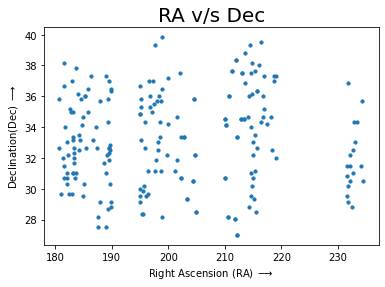

In [ ]:
#plotting a scatter plot for RA and Dec

plt.scatter(right_ascension,declination, s=10)
plt.xlabel('Right Ascension (RA) $\longrightarrow$')
plt.ylabel('Declination(Dec) $\longrightarrow$')
plt.title('RA v/s Dec', fontsize = 20)
plt.show()

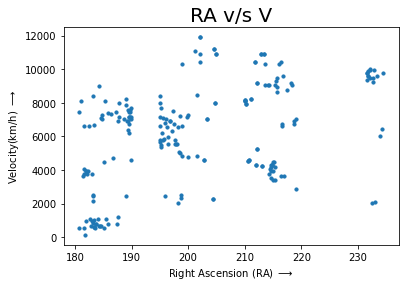

In [ ]:
#plotting a scatter plot for RA and V

plt.scatter(right_ascension,V, s=10)
plt.xlabel('Right Ascension (RA) $\longrightarrow$')
plt.ylabel('Velocity(km/h) $\longrightarrow$')
plt.title('RA v/s V', fontsize = 20)
plt.show()

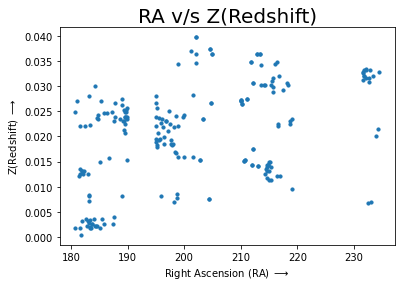

In [ ]:
#plotting a scatter plot for RA and Z(redshift)

plt.scatter(right_ascension,Z, s=10)
plt.xlabel('Right Ascension (RA) $\longrightarrow$')
plt.ylabel('Z(Redshift) $\longrightarrow$')
plt.title('RA v/s Z(Redshift)', fontsize = 20)
plt.show()

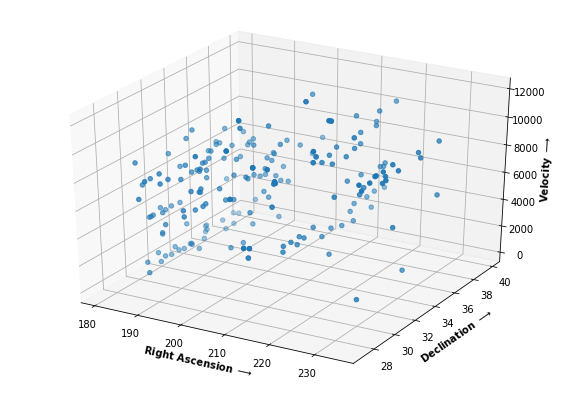

In [ ]:
# Function to create 3D scatter plot between RA,Dec, and velocities of galaxies
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Create Plot
ax.set_xlabel('Right Ascension $\longrightarrow$', fontweight ='bold')
ax.set_ylabel('Declination $\longrightarrow$', fontweight ='bold')
ax.set_zlabel('Velocity $\longrightarrow$', fontweight ='bold')
ax.scatter3D(right_ascension,declination,V)
plt.show()

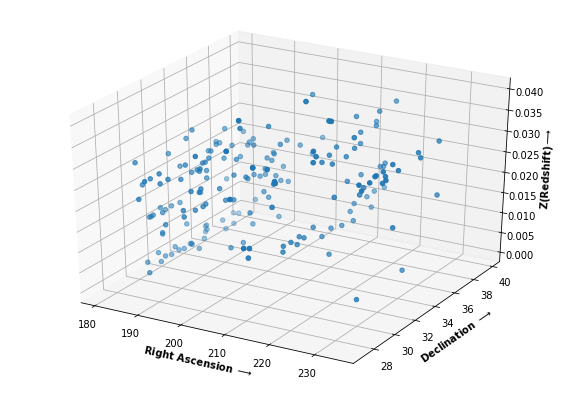

In [ ]:
# Function to create 3D scatter plot between RA,Dec, and redshift of galaxies
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Create Plot
ax.set_xlabel('Right Ascension $\longrightarrow$', fontweight ='bold')
ax.set_ylabel('Declination $\longrightarrow$', fontweight ='bold')
ax.set_zlabel('Z(Redshift)$\longrightarrow$', fontweight ='bold')
ax.scatter3D(right_ascension,declination,Z)
plt.show()

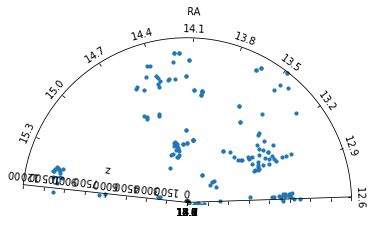

In [ ]:
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
from matplotlib.projections import PolarAxes
import matplotlib.pyplot as plt

def setup_axes3(fig, rect):
    tr = PolarAxes.PolarTransform() 

    ra0, ra1 =15.6,12.6        #max and min RA vals
    cz0, cz1 = 0, 12000      #max and min z vals
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")
    ax1.axis["bottom"].set_visible(True)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")
    ax1.axis["left"].label.set_text(r"z")
    ax1.axis["top"].label.set_text(r"RA")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    # aux_ax.patch = ax1.patch  
    # ax1.patch.zorder = 0.9  

    return ax1, aux_ax

fig = plt.figure()

ax3, aux_ax3 = setup_axes3(fig, 111)
rara = right_ascension/15
# theta = np.linspace(0,np.pi/2.)
# radius = np.linspace(0,1) 
aux_ax3.scatter(rara,V, s=10)
plt.show()